# Fading Technique

Teknik fading biasanya digunakan pada bagian awal musik atau akhir. Teknik ini biasanya digunakan untuk memperhalus peralihan antara dua bagian musik yang berbeda.

## Memuat File Audio
Audio dapat diunduh melalui [tautan berikut ini](https://github.com/informatika-itera/if4021-handson/blob/main/data/strings.wav)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import os

In [2]:
file_path = os.path.join(os.getcwd(), 'data', 'strings.wav')

# check apakah file ada
if not os.path.exists(file_path):
    print('File tidak ditemukan')

## Memuat Properties Audio

In [3]:
with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")
print(f"Jumlah sampel: {n_samples}")

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz
Jumlah sampel: 1469952


Yuk visualisasikan audio datanya supaya lebih mudah dipahami!

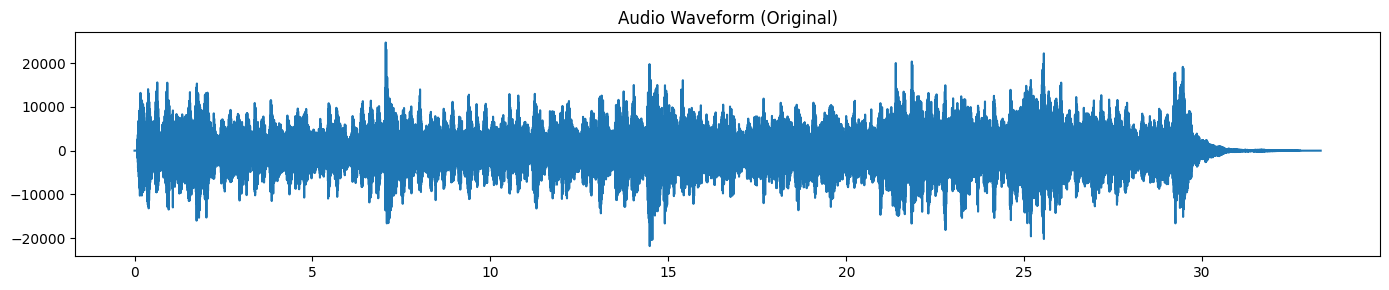

In [4]:
time_axis_second = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## Membuat Kurva Linear Fading

1. Tahap pertama adalah membuat kurva linear fading. Kita harus menentukan durasi dari fading yang diinginkan
2. Nantinya kurva linear ini akan dikalikan dengan data audio yang sebenarnya

Kurva linear berisi angka-angka pengali, mulai dari 0 hingga 1 sepanjang durasi fading

[0.00000000e+00 4.53516796e-06 9.07033592e-06 ... 9.99990930e-01
 9.99995465e-01 1.00000000e+00]
Length fade in curve: 220500


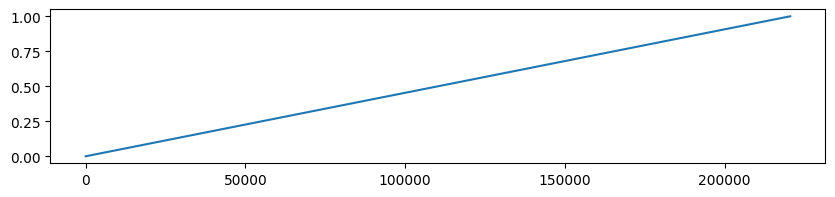

In [5]:
durasi_fading_detik = 5 # detik
durasi_fading_sample = durasi_fading_detik * fs

fade_in_curve = np.linspace(0, 1, durasi_fading_sample)
print(fade_in_curve)
print(f"Length fade in curve: {len(fade_in_curve)}")
plt.figure(figsize=(10, 2))
plt.plot(fade_in_curve)
plt.show()

## Mengalikan Kurva Linear Fading dengan `audio_data`

In [6]:
audio_data_fading = audio_data.copy()
audio_data_fading[:durasi_fading_sample] = audio_data_fading[:durasi_fading_sample] * fade_in_curve

mari kita lihat hasilnya bro..!

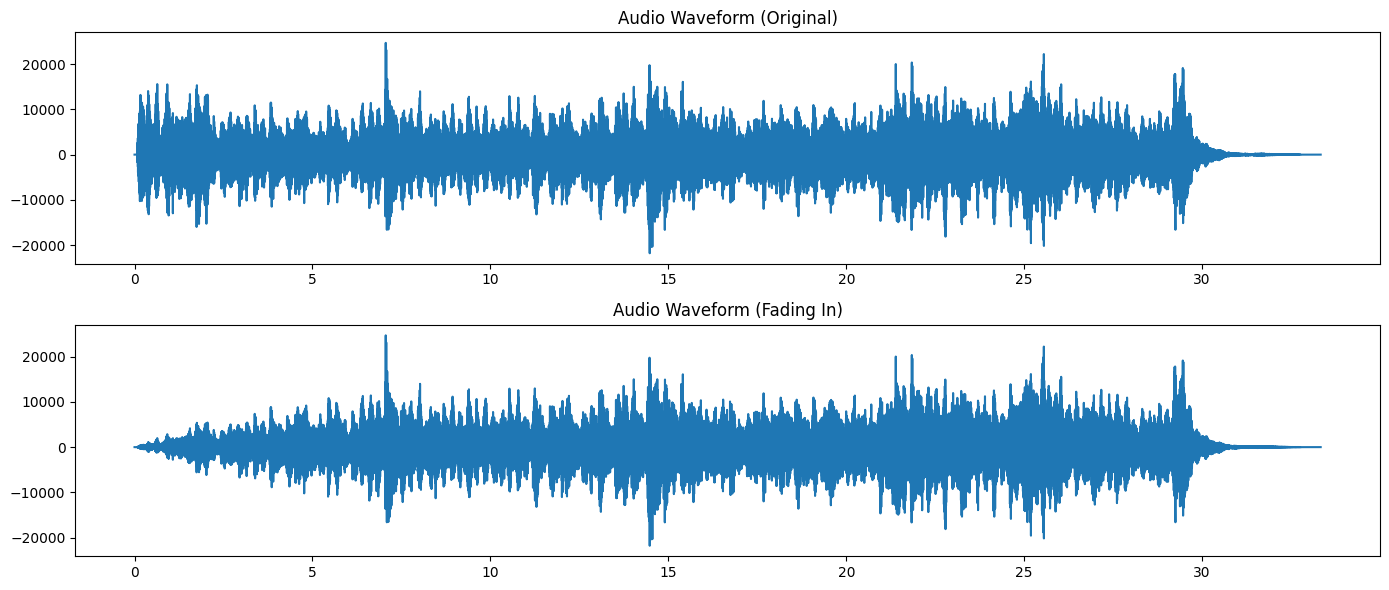

In [7]:
time_axis_second = np.linspace(0, n_samples/fs, n_samples)

ax, fig = plt.subplots(2, 1, figsize=(14, 6))
fig[0].plot(time_axis_second, audio_data)
fig[0].set_title('Audio Waveform (Original)')
fig[1].plot(time_axis_second, audio_data_fading)
fig[1].set_title('Audio Waveform (Fading In)')
plt.tight_layout()
plt.show()

yuk kita dengarkan hasilnya

In [8]:
save_path = os.path.join(os.getcwd(), 'data', 'strings_fading_in.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sample_width)
    wav_file.setframerate(fs)
    wav_file.writeframes(audio_data_fading.tobytes())

**Challenge**:
- Coba buat fade-out dengan durasi 5 detik

***

# Normalisasi Audio

**Apa itu normalisasi?**
- Normalisasi adalah proses mengubah level suara (tingkat amplitudo / volume) dari audio sehingga level suara tertinggi dari audio tersebut menjadi 0 dBFS (decibels relative to full scale).

**Mengapa harus 0 dBFS? Mengapa tidak 1?**
- Karena 0 dBFS adalah level tertinggi yang bisa dicapai oleh audio digital. Jika level suara melebihi 0 dBFS, maka audio tersebut akan distorsi.

Pada eksperimen ini kita akan menggunakan audio yang saya buat sendiri yaitu [this_is_me.wav](https://github.com/informatika-itera/if4021-handson/blob/main/data/this_is_me.wav)

## Memuat File Audio & Membaca Properties Audio & Visualisasi Audio

In [9]:
file_path = os.path.join(os.getcwd(), 'data', 'this_is_me.wav')

# check apakah file ada
if not os.path.exists(file_path):
    print('File tidak ditemukan')
    
with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")
print(f"Jumlah sampel: {n_samples}")

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz
Jumlah sampel: 337856


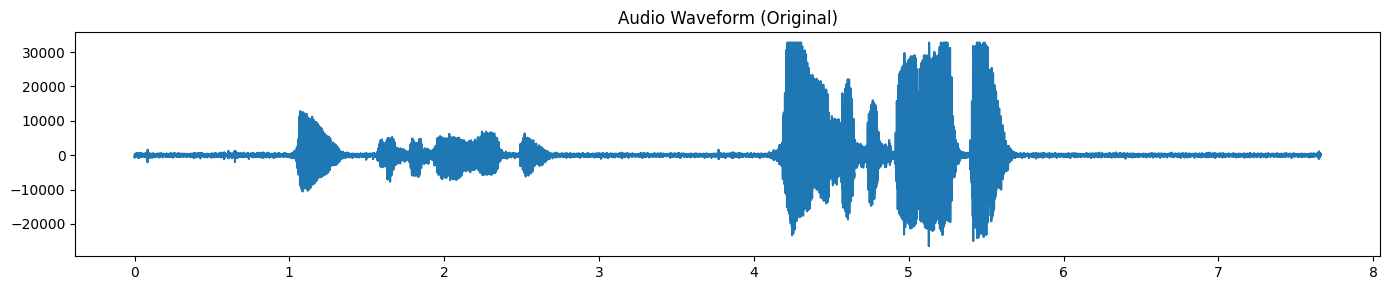

In [10]:
time_axis_second = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## Trim Audio

Kita hanya mau melakukan normalisasi pada bagian awal percakapan di rekaman suara tersebut. Oleh karena itu, kita perlu memotong audio tersebut.

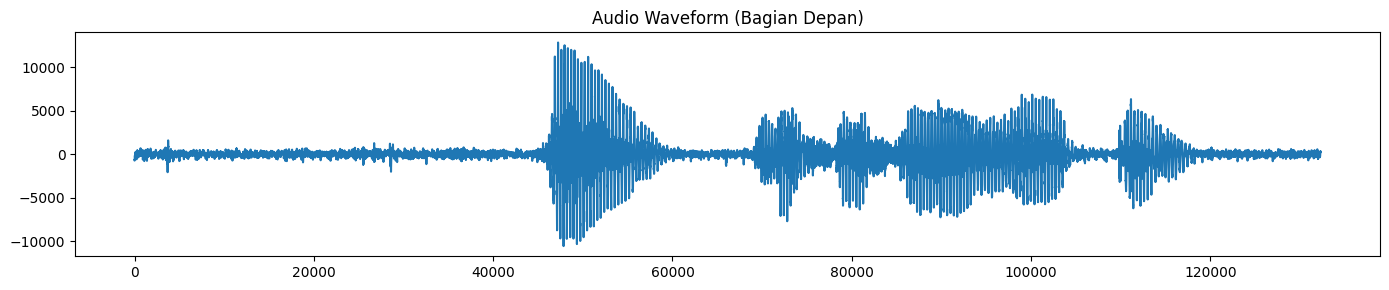

In [11]:
titik_potong_detik = 3 # detik
titik_potong_sample = titik_potong_detik * fs

audio_bagian_depan = audio_data[:titik_potong_sample]

plt.figure(figsize=(14, 3))
plt.plot(audio_bagian_depan)
plt.title('Audio Waveform (Bagian Depan)')
plt.tight_layout()
plt.show()

## Proses Normalisasi

Untuk melakukan normalisasi, hal pertama yang dilakukan adalah **mencari nilai maksimum dari audio tersebut.** Setelah itu, kita akan mengalikan audio tersebut dengan nilai normalisasi yang diinginkan sehingga nilai maksimum dari audio tersebut menjadi 0 dBFS.

In [12]:
nilai_max = np.max(np.abs(audio_bagian_depan))
print(f"Nilai maksimum: {nilai_max}")

Nilai maksimum: 12848


Setelah itu, kita mengingkan agar `nilai_max` ini menjadi bernilai 0 dBFS atau dalam integer bernilai `32767`

Sehingga, rumus perhitungan yang digunakan adalah:
$$
\text{audio normalized} = \frac{\text{audio}}{\text{nilai max}} \times 32767
$$

>Warning:
>Perhitungan menggunakan `32767` adalah asumsi bahwa audio tersebut memiliki bit depth 16-bit.
> Jika audio tersebut memiliki bit depth yang berbeda, maka nilai `32767` tersebut harus disesuaikan

**Mengapa 32767 berhubungan dengan 16-bit?**
- Karena nilai maksimum yang bisa dicapai oleh 16-bit adalah $2^{16-1} - 1 = 32767$ atau $2^{16} / 2 - 1 = 32767$

In [29]:
audio_bagian_depan_normalized = audio_bagian_depan / nilai_max * 32767
print(f"20 nilai pertama: {audio_bagian_depan_normalized[:20]}")

20 nilai pertama: [-1678.13558531 -1749.54561021 -1800.55277086 -1841.35849938
 -1846.45921544 -1851.55993151 -1826.05635118 -1775.04919054
 -1713.84059776 -1644.98093088 -1596.52412827 -1540.41625156
 -1481.75801681 -1428.20049813 -1351.68975716 -1287.93080635
 -1234.37328767 -1183.36612702 -1142.56039851 -1106.85538605]


Proses perkalian dapat menghasilkan nilai yang tidak bulat, oleh karena itu kita perlu melakukan pembulatan agar nilai tersebut menjadi integer.

In [30]:
audio_bagian_depan_normalized = audio_bagian_depan_normalized.astype(np.int16)
print(f"20 nilai pertama: {audio_bagian_depan_normalized[:20]}")

20 nilai pertama: [-1678 -1749 -1800 -1841 -1846 -1851 -1826 -1775 -1713 -1644 -1596 -1540
 -1481 -1428 -1351 -1287 -1234 -1183 -1142 -1106]


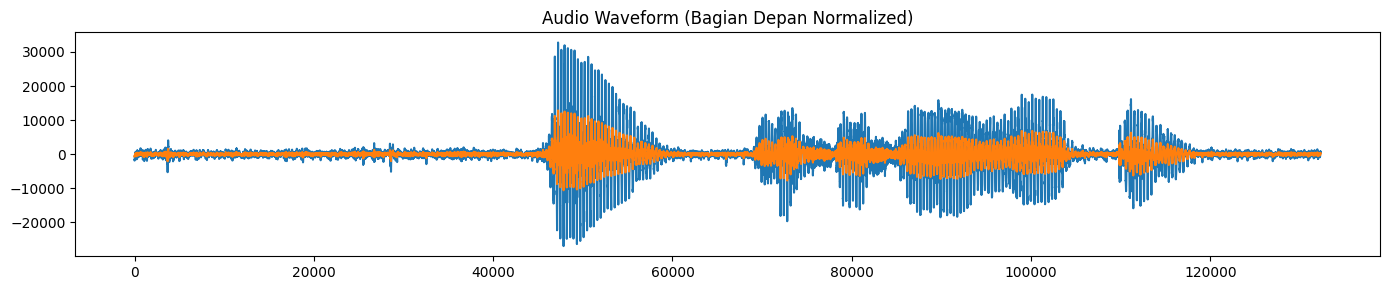

In [15]:
plt.figure(figsize=(14, 3))
plt.plot(audio_bagian_depan_normalized, label='Normalized')
plt.plot(audio_bagian_depan, label='Original')
plt.title('Audio Waveform (Bagian Depan Normalized)')
plt.tight_layout()
plt.show()

Mari kita kembalikan `audio_bagian_depan_normalized` ke `audio_data` asli

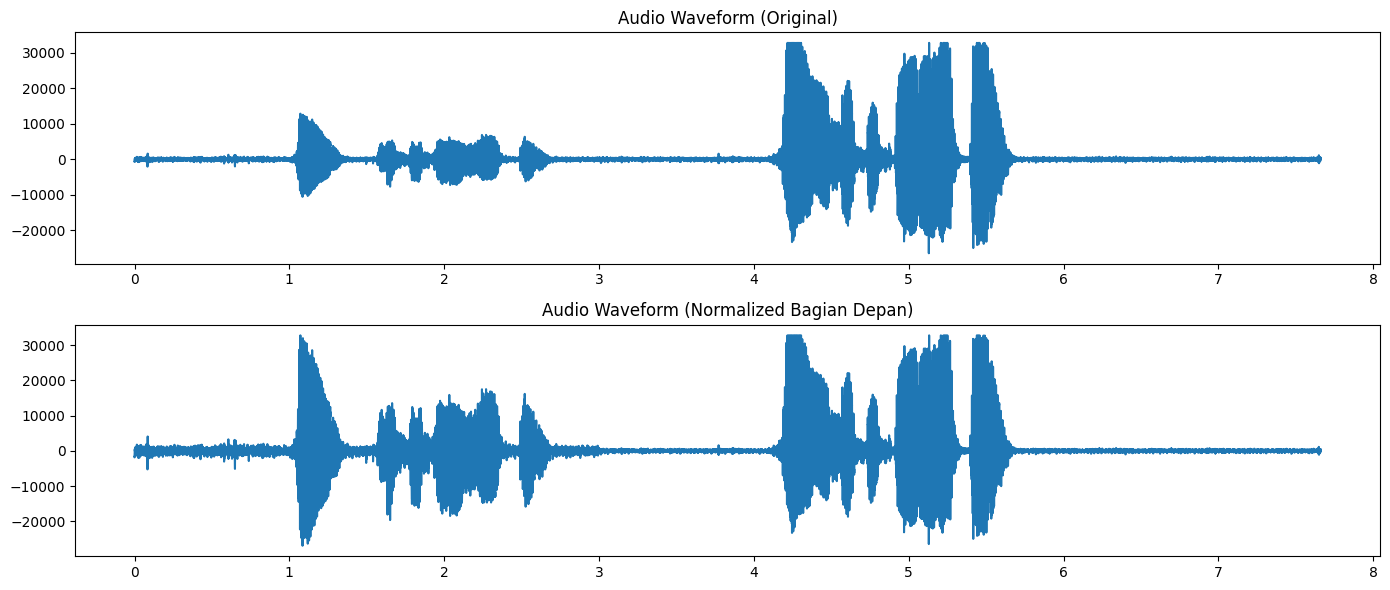

In [16]:
audio_data_hasil_normalized = np.concatenate([audio_bagian_depan_normalized, audio_data[titik_potong_sample:]])

ax, fig = plt.subplots(2, 1, figsize=(14, 6))
fig[0].plot(time_axis_second, audio_data)
fig[0].set_title('Audio Waveform (Original)')
fig[1].plot(time_axis_second, audio_data_hasil_normalized)
fig[1].set_title('Audio Waveform (Normalized Bagian Depan)')
plt.tight_layout()
plt.show()

Yuk kita dengerin hasilnya! (need to be fixed)

In [17]:
print(len(audio_data_hasil_normalized))

337856


In [18]:
save_path = os.path.join(os.getcwd(), 'data', 'this_is_me_normalized.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sample_width)
    wav_file.setframerate(fs)
    wav_file.writeframes(audio_data_hasil_normalized.tobytes())

---

# Menghitung Loudness (Kebisingan) Audio

Kita menggunakan audio `strings.wav` dan memuatnya kembali

In [19]:
file_path = os.path.join(os.getcwd(), 'data', 'strings.wav')

# check apakah file ada
if not os.path.exists(file_path):
    print('File tidak ditemukan')

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz
Jumlah sampel: 1469952


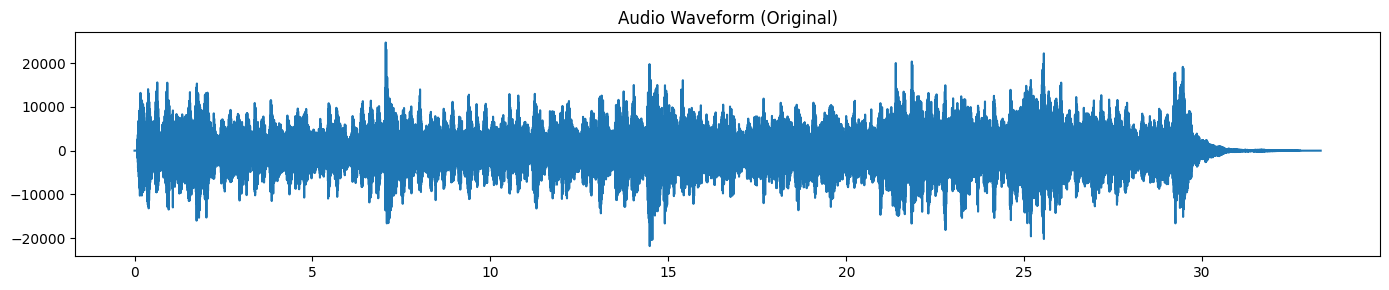

In [20]:
with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")
print(f"Jumlah sampel: {n_samples}")

time_axis_second = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## dBFS (decibel Full Scale)

dBFS adalah satuan untuk mengukur level suara dalam audio digital. 0 dBFS adalah level tertinggi yang bisa dicapai oleh audio digital.

Langkah 1: Mengubah audio menjadi format float32

In [21]:
audio_float = audio_data.astype(np.float32) / 32767.0

Langkah 2: Menghitung dBFS

Rumusnya adalah:
$$
 dbfs = 20 \times \log_{10} \left( \frac{rms}{\text{nilai maksimum}} \right)
$$

In [22]:
peak_amplitude = np.max(np.abs(audio_float))
dbfs = 20 * np.log10(peak_amplitude)
print(f"dbfs: {dbfs}")

dbfs: -2.459718883037567


Mari kita coba menaikkan volume audio tersebut

In [23]:
audio_data_hi = audio_float * 1.05

peak_amplitude = np.max(np.abs(audio_data_hi))
dbfs = 20 * np.log10(peak_amplitude)
print(f"dbfs: {dbfs}")

dbfs: -2.0359335839748383


## LUFS (Loudness Unit Full Scale)

LUFS adalah satuan untuk mengukur loudness dari audio. LUFS adalah satuan yang lebih baik daripada dBFS karena LUFS memperhitungkan loudness dari audio tersebut dalam jangka waktu yang lama.

Langkah 1: Menentukan b dan a

In [24]:
with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)

In [25]:
b = np.array([1.53512485958697, -2.69169618940638, 1.19839281085285])
a = np.array([1.0, -1.69065929318241, 0.73248077421585])

Langkah 2: Menghitung Data Audio yang telah diproses terhadap konstanta `a` dan `b`

In [26]:
audio_data_float = audio_data.astype(np.float32) / np.iinfo(np.int16).max
filtered_audio = np.zeros_like(audio_data_float)
for i in range(len(audio_data_float)):
    if i < 2:
        filtered_audio[i] = audio_data_float[i]
    else:
        filtered_audio[i] = b[0] * audio_data_float[i] + b[1] * audio_data_float[i-1] + b[2] * audio_data_float[i-2] - a[1] * filtered_audio[i-1] - a[2] * filtered_audio[i-2]

Langkah 3: Menghitung Mean Square

In [27]:
ms = np.mean(np.square(filtered_audio))

Langkah 4: Menghitung LUFS-nya

Rumusnya adalah:
$$
lufs = -0.691 + 10 \times \log_{10} \left( \frac{1}{N} \times \sum_{n=1}^{N} 10^{0.1 \times \text{data}[n]} \right)
$$

In [28]:
lufs = -0.691 + 10 * np.log10(ms)
print(f"LUFS: {lufs}")

LUFS: -20.668402687072753


---

# Compression

- Compression adalah teknik untuk mengurangi dynamic range dari audio.
- Dynamic range adalah perbedaan antara level suara tertinggi dan terendah dari audio tersebut.
- Dengan kata lain: compression bertujuan untuk meningkatkan volume/level suara yang kecil menjadi lebih besar tanpa membuat yang besar menjadi semakin besar

In [37]:
file_path = os.path.join(os.getcwd(), 'data', 'this_is_me.wav')

with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    fs = wav_file.getframerate()
    n_samples = wav_file.getnframes()
    
    audio_content = wav_file.readframes(n_samples)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
print(f"Jumlah channel: {n_channels}")
print(f"Frekuensi Sampling: {fs} Hz")
print(f"Jumlah sampel: {n_samples}")

Jumlah channel: 1
Frekuensi Sampling: 44100 Hz
Jumlah sampel: 337856


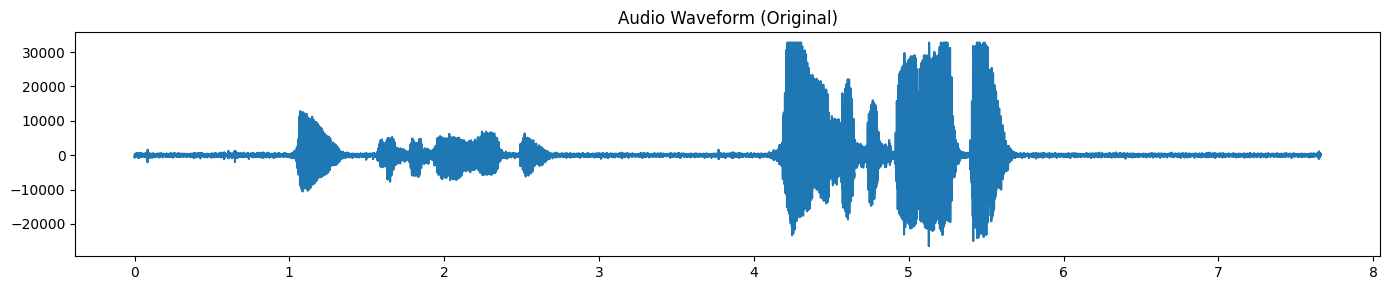

In [38]:
time_axis_second = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis_second, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

Langkah pertama: Menghitung niali maximum dari audio tersebut dan membuat treshold (ambang batas kompresi)

Dalam hal ini, `threshold` akan diset pada setengah dari nilai maksimum audio tersebut.

In [48]:
max_val = np.max(np.abs(audio_data))
print(f"Max value: {max_val}")

threshold = 0.4 * max_val
print(f"Threshold: {threshold}")

Max value: 32767
Threshold: 13106.800000000001


Langkah kedua: Kita duplikat data audio asli

In [49]:
compressed_audio = audio_data.copy()

Langkah ketiga: Membuat masking (`mask`)

`mask` adalah sebuah indeks yang menujukkan di mana saja audio tersebut melebihi `threshold`

In [50]:
mask = np.abs(compressed_audio) > threshold
print(f"Jumlah sampel yang harus dikompres: {np.sum(mask)}")

Jumlah sampel yang harus dikompres: 10116


Langkah keempat: Mengurangi level suara dari audio yang melebihi `threshold`

In [51]:
ratio = 6

compressed_audio[mask] = threshold + (np.abs(compressed_audio[mask]) - threshold) / ratio
compressed_audio = np.clip(compressed_audio, -max_val, max_val)

Preview

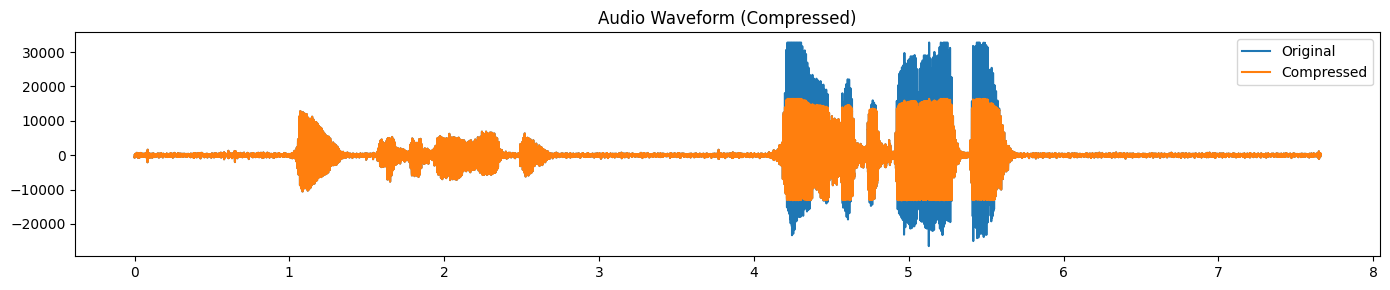

In [52]:
time_axis = np.linspace(0, n_samples/fs, n_samples)

plt.figure(figsize=(14, 3))
plt.plot(time_axis, audio_data, label='Original')
plt.plot(time_axis, compressed_audio, label='Compressed')
plt.title('Audio Waveform (Compressed)')
plt.tight_layout()
plt.legend()
plt.show()


Langkah kelima: Menaikkan keseluruhan level audio

Saat ini semua level audio sudah berada di bawah `threshold`. Sehingga, supaya semuanya memiliki level yang sama, kita perlu menaikkan level audio tersebut.

In [53]:
nilai_max = np.max(np.abs(compressed_audio))
compressed_audio_normalized = compressed_audio / nilai_max * 32767
compressed_audio_normalized = compressed_audio_normalized.astype(np.int16)

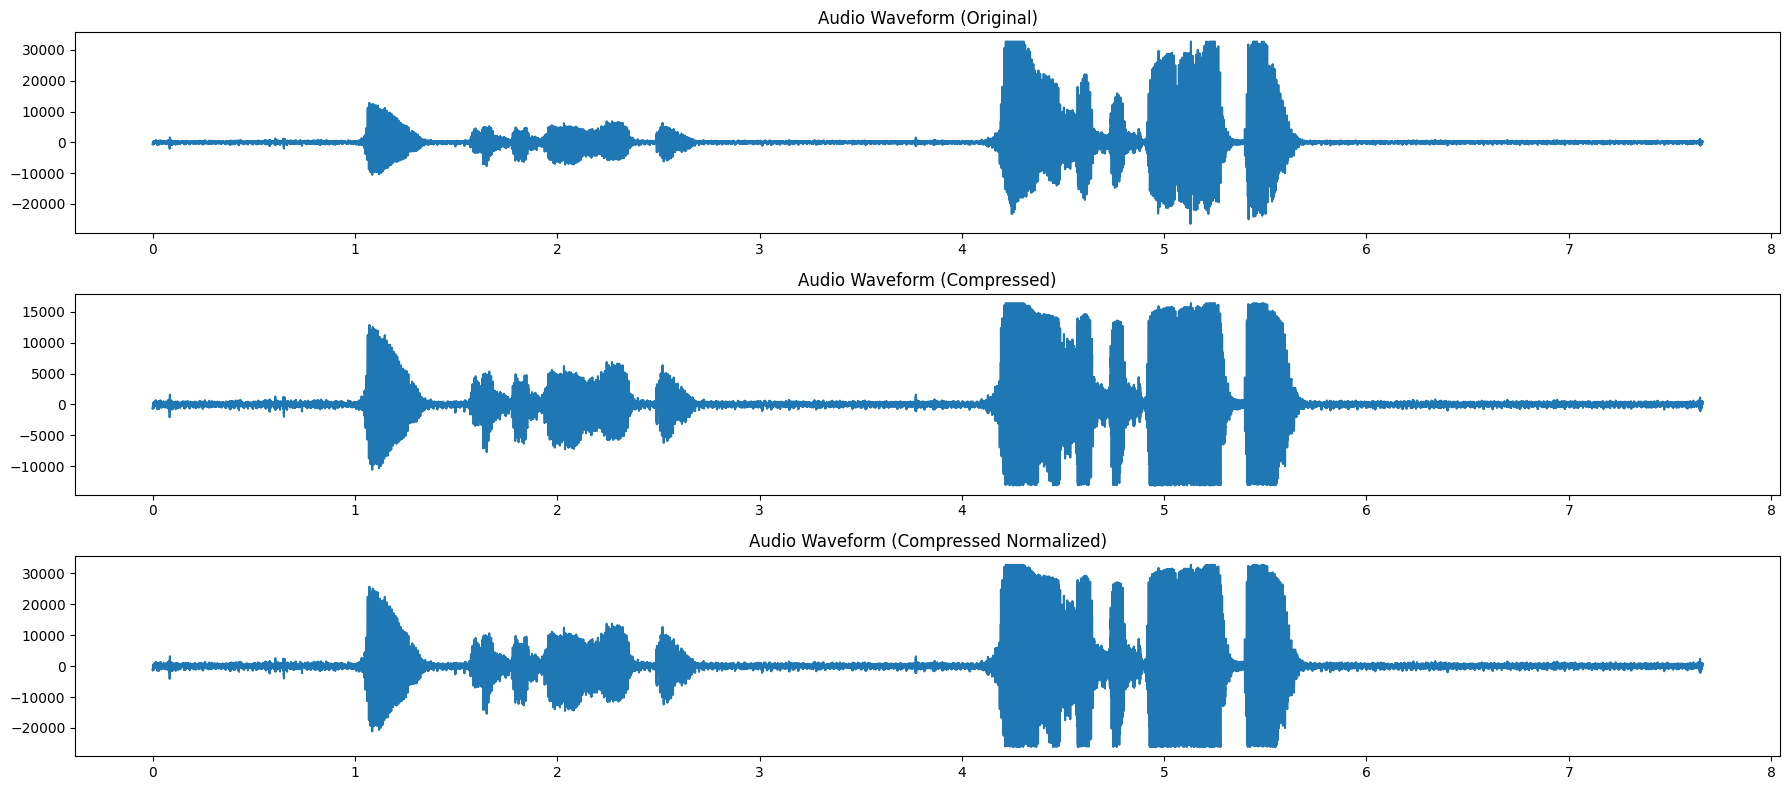

In [65]:
ax, fig = plt.subplots(3, 1, figsize=(18, 8))
fig[0].plot(time_axis, audio_data, label='Original')
fig[0].set_title('Audio Waveform (Original)')
fig[1].plot(time_axis, compressed_audio, label='Compressed')
fig[1].set_title('Audio Waveform (Compressed)')
fig[2].plot(time_axis, compressed_audio_normalized, label='Compressed Normalized')
fig[2].set_title('Audio Waveform (Compressed Normalized)')
plt.tight_layout()
plt.show()

***

# Equalization

Pernah mendengar istilah "treble" dan "bass" pada audio? Itu adalah bagian dari equalization.

## Teori Dasar

- **Low Pass Filter (High Cut)**: Low Pass Filter memungkinkan frekuensi rendah untuk lewat, sementara memblokir frekuensi tinggi. Filter ini digunakan untuk menghilangkan noise frekuensi tinggi atau untuk menghasilkan efek suara yang lebih halus.

- **High Pass Filter (Low Cut)**: High Pass Filter melewatkan frekuensi tinggi dan memblokir frekuensi rendah. Filter ini sering digunakan untuk menghilangkan hum atau suara mendengung yang biasanya berada di frekuensi rendah.

- **Bandpass Filter**: Bandpass Filter hanya melewatkan rentang frekuensi tertentu, sementara frekuensi di bawah dan di atas rentang ini diblokir. Filter ini berguna untuk mengekstrak sinyal pada rentang frekuensi tertentu dari sebuah sinyal yang lebih kompleks.

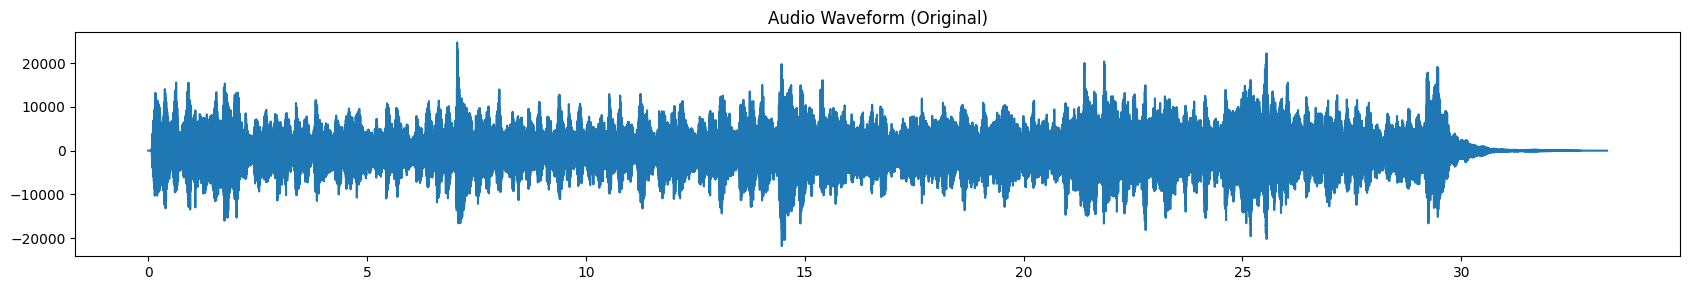

In [72]:
file_path = os.path.join(os.getcwd(), 'data', 'strings.wav')

with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sampwidth = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    audio_content = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
time_axis = np.linspace(0, n_frames/framerate, n_frames)

plt.figure(figsize=(17, 3))
plt.plot(time_axis, audio_data)
plt.title('Audio Waveform (Original)')
plt.tight_layout()
plt.show()

## Visualisasi Spektrum Frekuensi Sebelum Equalization

Disediakan dalam bentuk fungsi

In [79]:
def plot_frequency_spectrum(data, framerate, title):
    fft_data = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(fft_data), 1 / framerate)
    
    positive_frequencies = frequencies[:len(frequencies) // 2]
    magnitude = np.abs(fft_data[:len(frequencies) // 2])
    
    plt.figure(figsize=(20, 6))
    plt.plot(positive_frequencies, magnitude)
    plt.xscale('log')
    plt.xlim(20, 20000)  # Rentang frekuensi yang relevan untuk audio
    plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000], 
               ['20 Hz', '50 Hz', '100 Hz', '200 Hz', '500 Hz', '1 kHz', '2 kHz', '5 kHz', '10 kHz', '20 kHz'])
    plt.title(title)
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

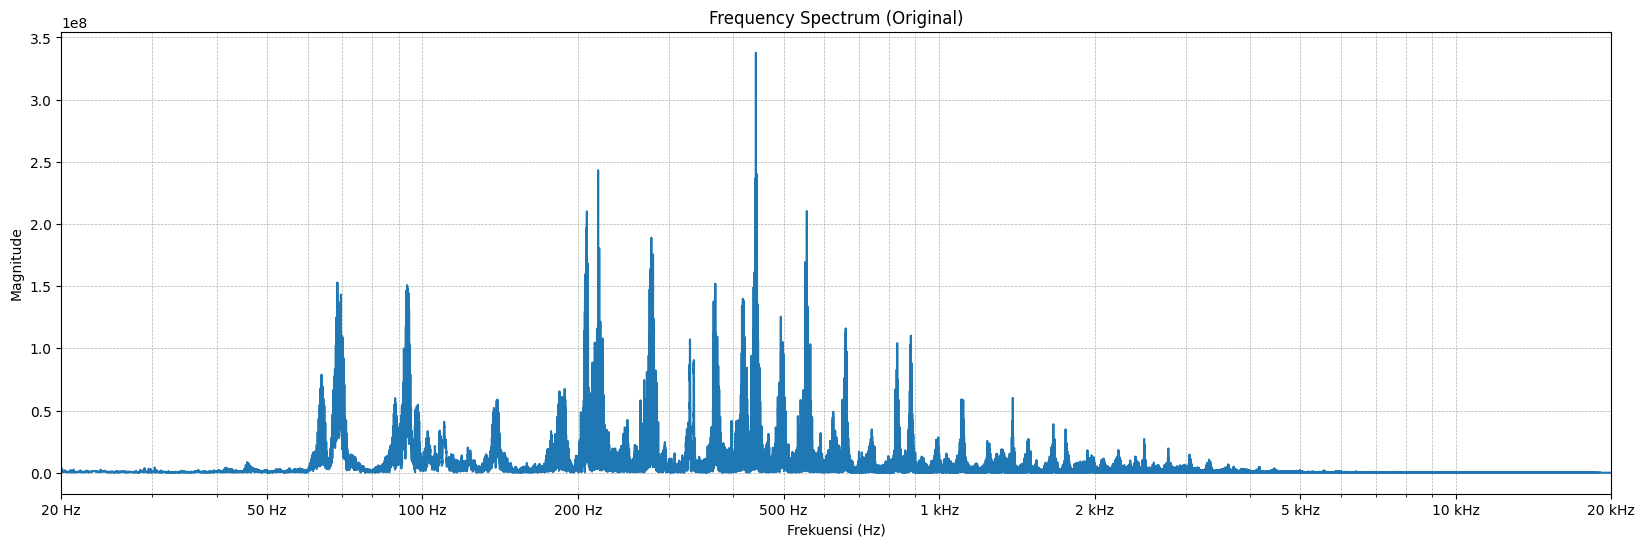

In [80]:
plot_frequency_spectrum(audio_data, framerate, 'Frequency Spectrum (Original)')

## Menerapkan Filter

### High Pass Filter (Low Cut)
High pass berarti melewatkan frekuensi high dan memblokir frekuensi low. Filter ini sering digunakan untuk menghilangkan hum atau suara mendengung yang biasanya berada di frekuensi rendah.

In [107]:
from scipy.signal import butter, filtfilt

cut_off = 2000 # hz
order = 5

In [108]:
print(f"Frekuensi Sampling (FS): {framerate} Hz")

Frekuensi Sampling (FS): 44100 Hz


Cara menerapkannya adalah:

In [109]:
b,a = butter(order, cut_off / (framerate / 2), btype='high')
audio_highpass = filtfilt(b, a, audio_data)

In [110]:
# konversi menjadi integer 16-bit
audio_highpass = audio_highpass.astype(np.int16)

Mari kita lihat hasilnya

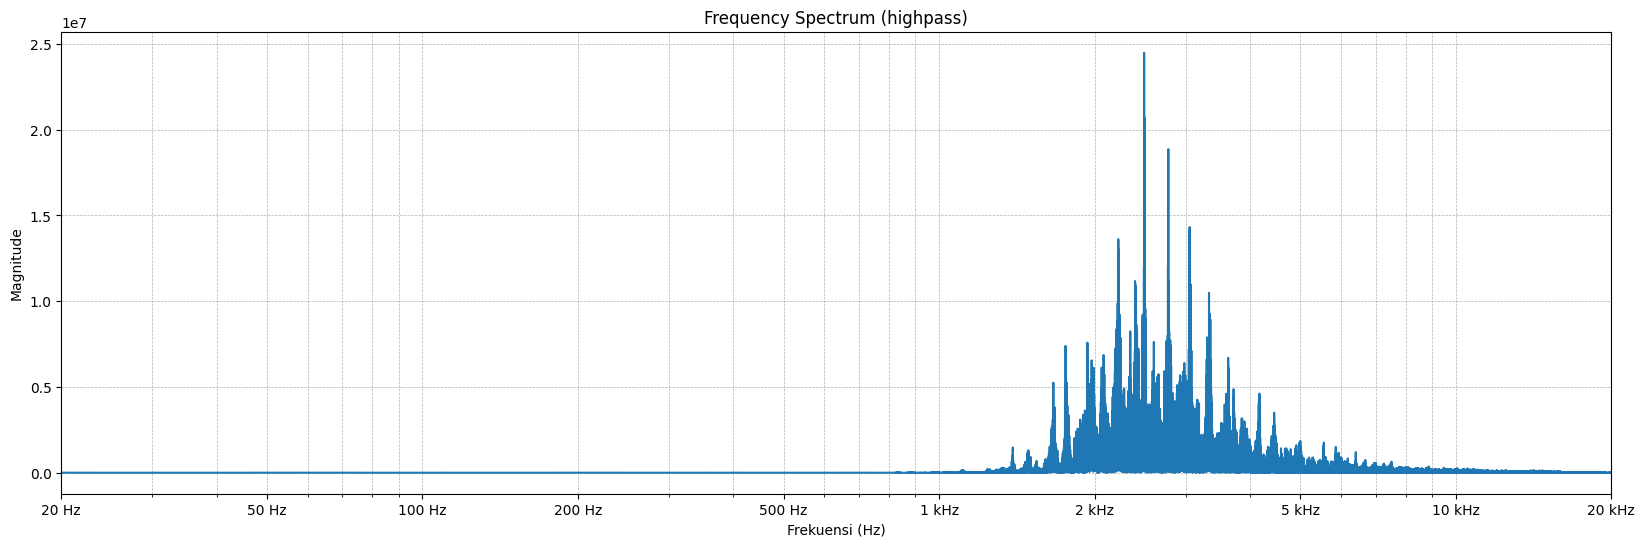

In [111]:
plot_frequency_spectrum(audio_highpass, framerate, 'Frequency Spectrum (highpass)')

mari kita dengarkan hasilnya

In [112]:
save_path = os.path.join(os.getcwd(), 'data', 'strings_highpass.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.writeframes(audio_highpass.tobytes())

## Low Pass Filter (High Cut)

Low pass berarti melewatkan frekuensi low dan memblokir frekuensi high. Filter ini digunakan untuk menghilangkan noise frekuensi tinggi atau untuk menghasilkan efek suara yang lebih halus.

In [113]:
cut_off = 400 # hz
order = 5

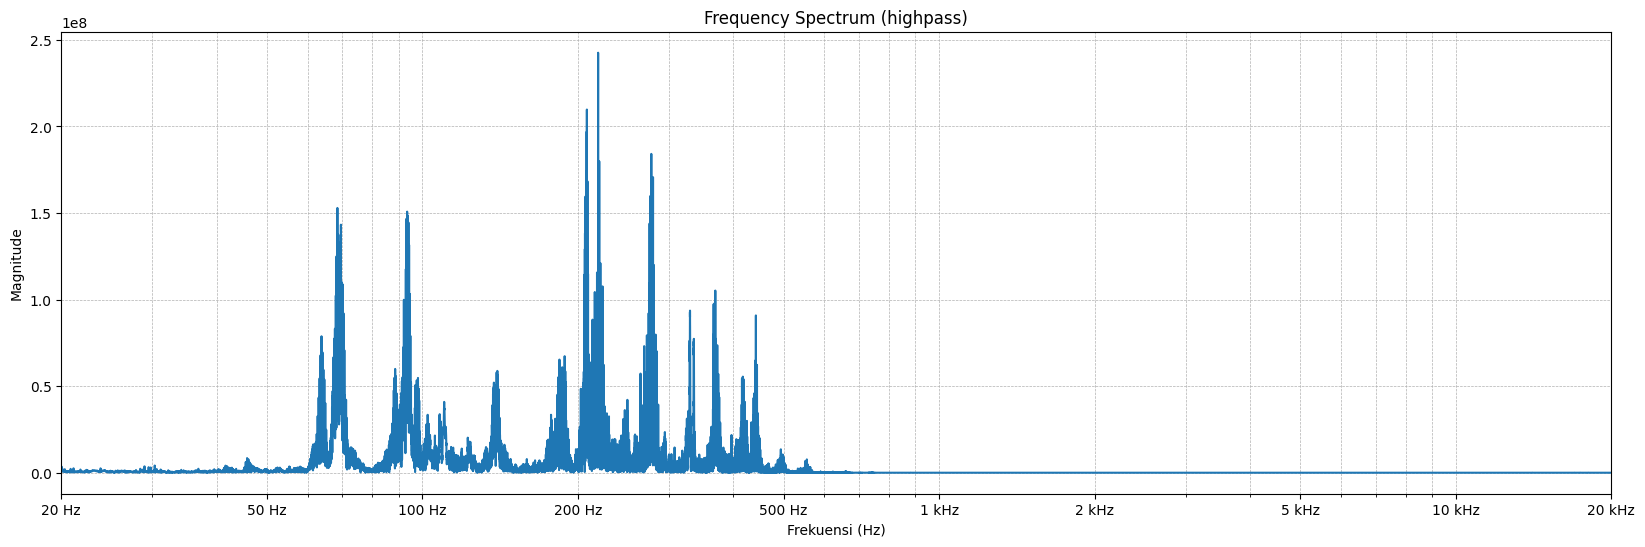

In [114]:
b,a = butter(order, cut_off / (framerate / 2), btype='Low')
audio_lowpass = filtfilt(b, a, audio_data)
audio_lowpass = audio_lowpass.astype(np.int16)

plot_frequency_spectrum(audio_lowpass, framerate, 'Frequency Spectrum (highpass)')

mari kita dengarkan hasilnya

In [115]:
save_path = os.path.join(os.getcwd(), 'data', 'strings_lowpass.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.writeframes(audio_lowpass.tobytes())

## Bandpass Filter

Bandpass adalah filter yang hanya melewatkan rentang frekuensi tertentu, sementara frekuensi di bawah dan di atas rentang ini diblokir. Filter ini berguna untuk mengekstrak sinyal pada rentang frekuensi tertentu dari sebuah sinyal yang lebih kompleks.

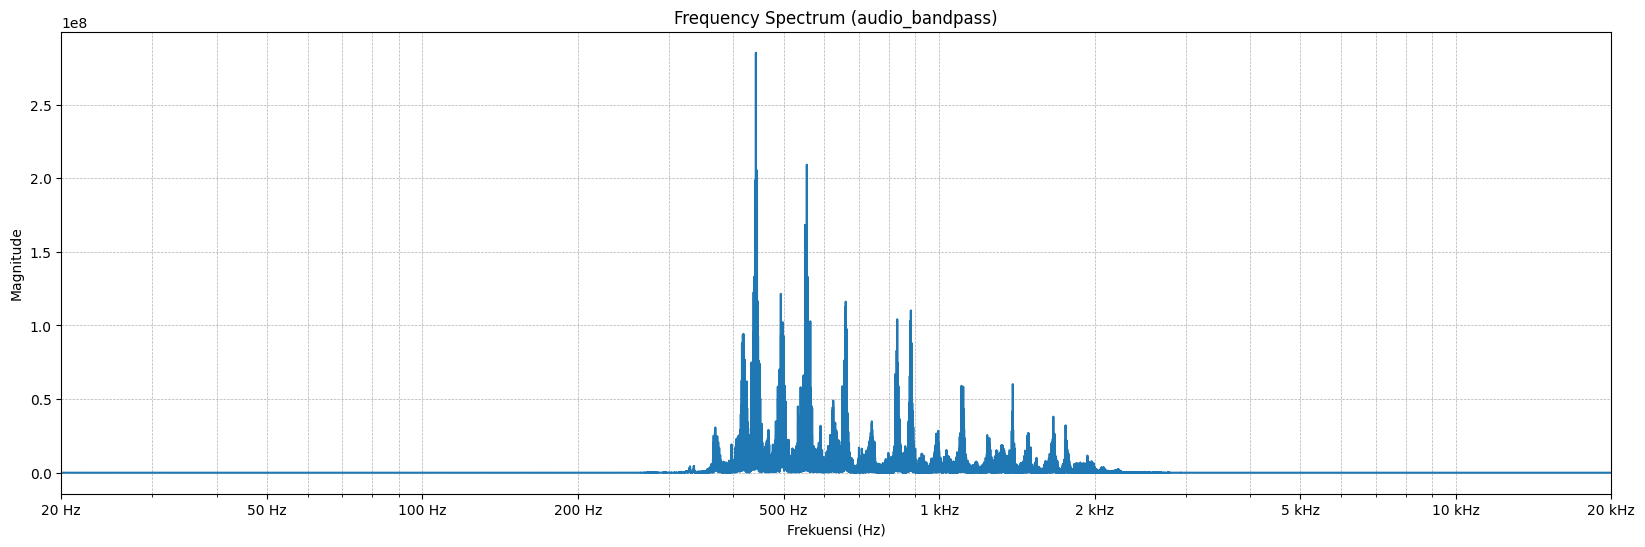

In [131]:
cut_off_low = 400 # hz, artinya frekuensi di bawah 400 hz akan dibuang
cut_off_high = 2000 # hz, artinya frekuensi di atas 2000 hz akan dibuang
order = 6

cut_off_low_nyquist = cut_off_low / (framerate / 2)
cut_off_high_nyquist = cut_off_high / (framerate / 2)

b,a = butter(order, [cut_off_low_nyquist, cut_off_high_nyquist], btype='band')
audio_bandpass = filtfilt(b, a, audio_data)
audio_bandpass = audio_bandpass.astype(np.int16)

plot_frequency_spectrum(audio_bandpass, framerate, 'Frequency Spectrum (audio_bandpass)')

In [121]:
save_path = os.path.join(os.getcwd(), 'data', 'strings_bandpass.wav')

with wave.open(save_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.writeframes(audio_bandpass.tobytes())

---

---

## Tugas: `ho1`
2. Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda.
    - Untuk mahasiswa ber-nim akhir ganjil, implementasikan teknik fading Logarithmic Scale Fading
    - Untuk mahasiswa ber-nim akhir genap, implementasikan teknik fading Exponential
    - Lakukan fading untuk bagian awal dan akhir dari audio

3. Dengan menggunakan file audio yang anda rekam sendiri (suara anda), lakukanlah kompresi dan normalisasi hingga loudness LUFS mencapai kira-kira sekitar -14 LUFS. Berikan penjelasan langkah-langkah yang anda lakukan untuk menyelesaikan tugas ini.

4. Rekamlah sebuah audio dengan menggunakan handphone / laptop anda. Cara anda merekam haruslah sedikit unik:
    - Anda harus berbicara selama 20 detik.
    - Bacaan / percakapan yang anda rekam haruslah berisi informasi mengenai diri anda, seperti nama, asal daerah, hobi, dll.
    - Lakukanlah perekaman di dekat sumber noise statis seperti kipas angin, AC, atau kipas laptop anda (atau apapun yang merupakan noise frekuensi tinggi)
    - Lakukanlah equalisasi pada audio tersebut dengan menggunakan bandpass. Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam.
    - Visualisasikan spektrum frekuensi dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).

5. Tanyakan pada AI/LLM bagaimana cara membuat noise gate pada audio. Lalu implementasikan noise gate ini pada audio yang telah anda rekam. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda. Gunakan file audio dari soal nomor 4.




### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

> Saya sudah mendapatkan akses ke server [MOSS Stanford](https://theory.stanford.edu/~aiken/moss/) untuk menggunakan sistem mereka dalam mata kuliah ini untuk mendeteksi code yang "plagiat". Untuk menjamin bahwa code anda tidak terindikasi plagiarisme, silahkan gunakan nama variabel / parameter / dan konfigurasi yang unik dan tidak copy paste. Dan yang terpenting, berusahalah bekerja sendiri. Jika mendapat bantuan baik dari manusia maupun AI / web, segera cantumkan dalam bagian terakhir `ipynb` anda.

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan


Link pengumpulan: [GOOGLE FORM](https://docs.google.com/forms/d/e/1FAIpQLSfO2fKN6DYdVGv_XZC155IJ8-zYDNvjLeMqao9ecff3xtzDkQ/viewform)

Deadline: 4 Oktober 2024, 23.59 WIB

Penalti keterlambatan:
- 10% per jam keterlambatan

